In [1]:
#Merging of Market and Economic Data
import quandl as q
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [2]:
#import macro data
data_gdp = q.get("FRED/GDPC1", start_date="2015-06-01", end_date="2019-06-01",collapse='daily', 
                 authtoken="oWpRXksxc4gyrtAwXe18")
%store data_gdp

data_infl = q.get("FRED/CPIAUCSL", start_date="2015-06-01", end_date="2019-06-01",collapse='daily', 
                  authtoken="oWpRXksxc4gyrtAwXe18")
%store data_infl

data_int = q.get("FRED/DFF", start_date="2015-06-01", end_date="2019-06-01",collapse='daily', 
                 authtoken="oWpRXksxc4gyrtAwXe18")
%store data_int

data_unemp = q.get("FRED/UNRATE", start_date="2015-06-01", end_date="2019-06-01",collapse='daily', 
                   authtoken="oWpRXksxc4gyrtAwXe18")
%store data_unemp

data_savings = q.get("FRED/PSAVERT", start_date="2015-06-01", end_date="2019-06-01",collapse='daily', 
                     authtoken="oWpRXksxc4gyrtAwXe18")
%store data_savings


Stored 'data_gdp' (DataFrame)
Stored 'data_infl' (DataFrame)
Stored 'data_int' (DataFrame)
Stored 'data_unemp' (DataFrame)
Stored 'data_savings' (DataFrame)


In [3]:
data_gdp

,Value
Date,
2015-07-01,17463.222
2015-10-01,17468.902
2016-01-01,17556.839
2016-04-01,17639.417
2016-07-01,17735.074
2016-10-01,17824.231
2017-01-01,17925.256
2017-04-01,18021.048
2017-07-01,18163.558


In [4]:
macro_data = pd.concat([data_gdp,data_infl,data_int,data_unemp,data_savings],axis=1)

In [5]:
#import market sentiment adjusted close price
data_vix = pd.read_csv('VIX.csv', header=0,usecols=['Date','Adj Close'], 
                   parse_dates=True, index_col='Date')

In [6]:
macro_market_data = pd.concat([macro_data, data_vix], axis=1)
%store macro_market_data

Stored 'macro_market_data' (DataFrame)


In [7]:
macro_market_data.columns = ['Real GDP','CPI All','Fed Rate','Unemployment rate','Personal Savings Rate','VIX']

In [8]:
df_m = pd.DataFrame(macro_market_data)
df_m = df_m.fillna(method='ffill')
df_m = df_m.dropna()

Stored 'df_m' (DataFrame)


In [21]:
scaler = MinMaxScaler()
scaled_macro_market = scaler.fit_transform(df_m)
print(scaled_macro_market)
%store scaled_macro_market

[[0.         0.03274277 0.02521008 1.         0.52       0.13794926]
 [0.         0.03274277 0.02521008 1.         0.52       0.13794926]
 [0.         0.03274277 0.02521008 1.         0.52       0.13794926]
 ...
 [1.         0.99159004 0.97478992 0.         0.68       0.48625788]
 [1.         0.99159004 0.9789916  0.         0.68       0.48625788]
 [1.         1.         0.9789916  0.0625     0.72       0.48625788]]
Stored 'scaled_macro_market' (ndarray)


In [17]:
len(scaled_macro_market)

1432

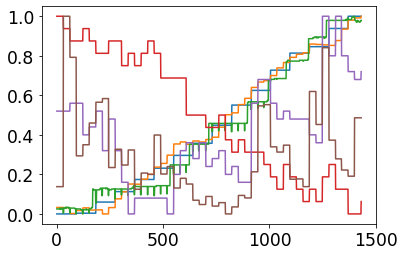

In [18]:
plt.plot(scaled_macro_market)

In [19]:
#principle compo 1 and 2
pca = PCA(n_components=3)
pca_component_macro_mkt = pca.fit_transform(scaled_macro_market)

%store pca_component_macro_mkt

Stored 'pca_component_macro_mkt' (ndarray)


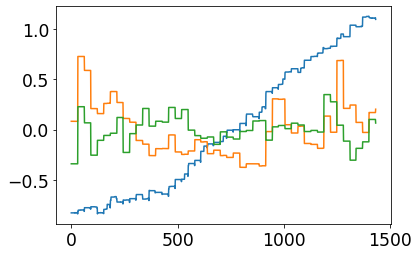

In [20]:
plt.plot(pca_component_macro_mkt)